In [1]:
num_of_lamps = 4
search_space_qubits = 2
helper_qubits = num_of_lamps - 1
number_of_iterations = 1

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi

oracle = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.ccx(0,1,search_space_qubits)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.z(search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits + num_of_lamps, search_space_qubits + num_of_lamps + 1, search_space_qubits + num_of_lamps + 2)
oracle.ccx(search_space_qubits+2, search_space_qubits+3, search_space_qubits + num_of_lamps + 1)
oracle.ccx(search_space_qubits, search_space_qubits+1, search_space_qubits + num_of_lamps)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

oracle.ccx(0,1,search_space_qubits)

oracle.x(1)
oracle.ccx(0,1,search_space_qubits+1)
oracle.x(1)

oracle.x(0)
oracle.ccx(0,1,search_space_qubits+2)
oracle.x(0)

oracle.x(0)
oracle.x(1)
oracle.ccx(0,1,search_space_qubits+3)
oracle.x(0)
oracle.x(1)

for i in range(num_of_lamps):
    oracle.x(search_space_qubits + i)

grover = QuantumCircuit(search_space_qubits + num_of_lamps + helper_qubits, search_space_qubits)

#Input
grover.x(search_space_qubits+1)
grover.x(search_space_qubits+2)
grover.x(search_space_qubits+3)

for i in range(search_space_qubits):
    grover.h(i)
grover.barrier()

for i in range(number_of_iterations):
    grover = grover.compose(oracle)
    
    for j in range(search_space_qubits):
        grover.h(j)
    for j in range(search_space_qubits):
        grover.x(j)
    grover.cz(0,1)
    for j in range(search_space_qubits):
        grover.x(j)
    for j in range(search_space_qubits):
        grover.h(j)

grover.measure(range(search_space_qubits),range(search_space_qubits))

job = AerSimulator().run(grover,shots=10000)
counts = job.result().get_counts(grover)
print(counts)


{'11': 10000}


In [ ]:
import os
os.environ["IQM_TOKEN"] = input()

In [5]:
from iqm.qiskit_iqm import IQMProvider

# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/sirius")
backend = provider.get_backend()

C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:150: UserWarning: The given IQM Server URL is in a deprecated format, see the client initialization instructions and correct URL format from the server web dashboard.
  warnings.warn(
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:171: UserWarning: Resonance CoCoS API is deprecated. Use https://resonance.meetiqm.com. See the Resonance documentation or https://docs.meetiqm.com/iqm-client/ for more detailed instructions.
  warnings.warn(


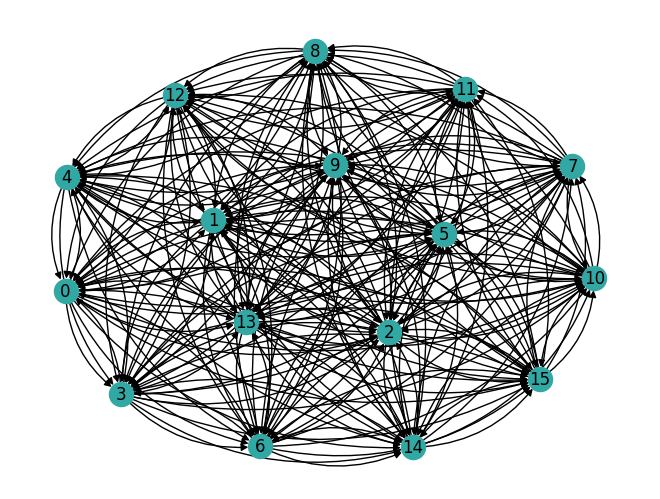

In [6]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

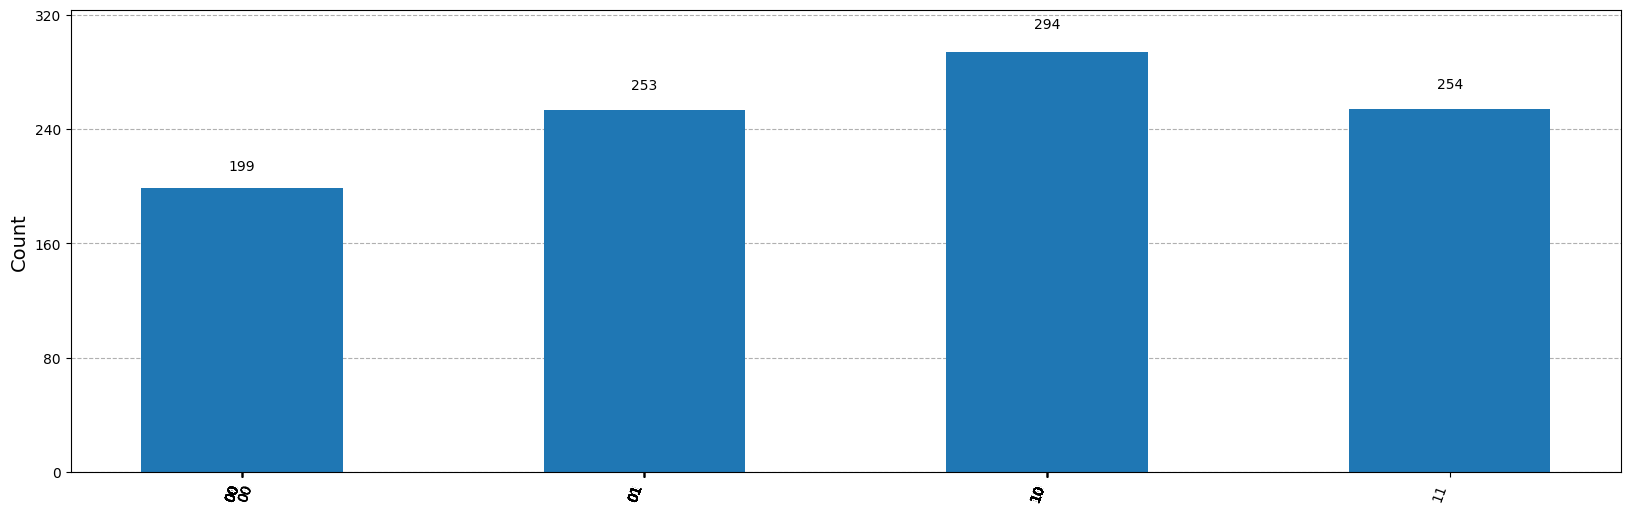

In [7]:
from qiskit import transpile
import matplotlib.pyplot as plt

qc_transpiled = transpile(grover, backend)
job = backend.run(qc_transpiled, shots=1000)

import qiskit
if qiskit.__version__ < '1.0.0':
    # The job monitor is only compatible with qiskit versions smaller than 1.0
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)

res=job.result()
counts=res.get_counts()

#Plot the results
from qiskit.visualization import plot_histogram
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()


In [8]:
from iqm.qiskit_iqm import IQMProvider

# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/emerald")
backend = provider.get_backend()

C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:150: UserWarning: The given IQM Server URL is in a deprecated format, see the client initialization instructions and correct URL format from the server web dashboard.
  warnings.warn(
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:171: UserWarning: Resonance CoCoS API is deprecated. Use https://resonance.meetiqm.com. See the Resonance documentation or https://docs.meetiqm.com/iqm-client/ for more detailed instructions.
  warnings.warn(


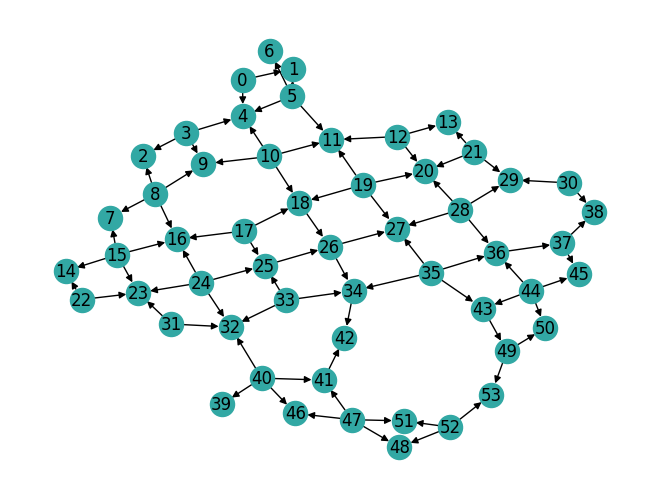

In [9]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

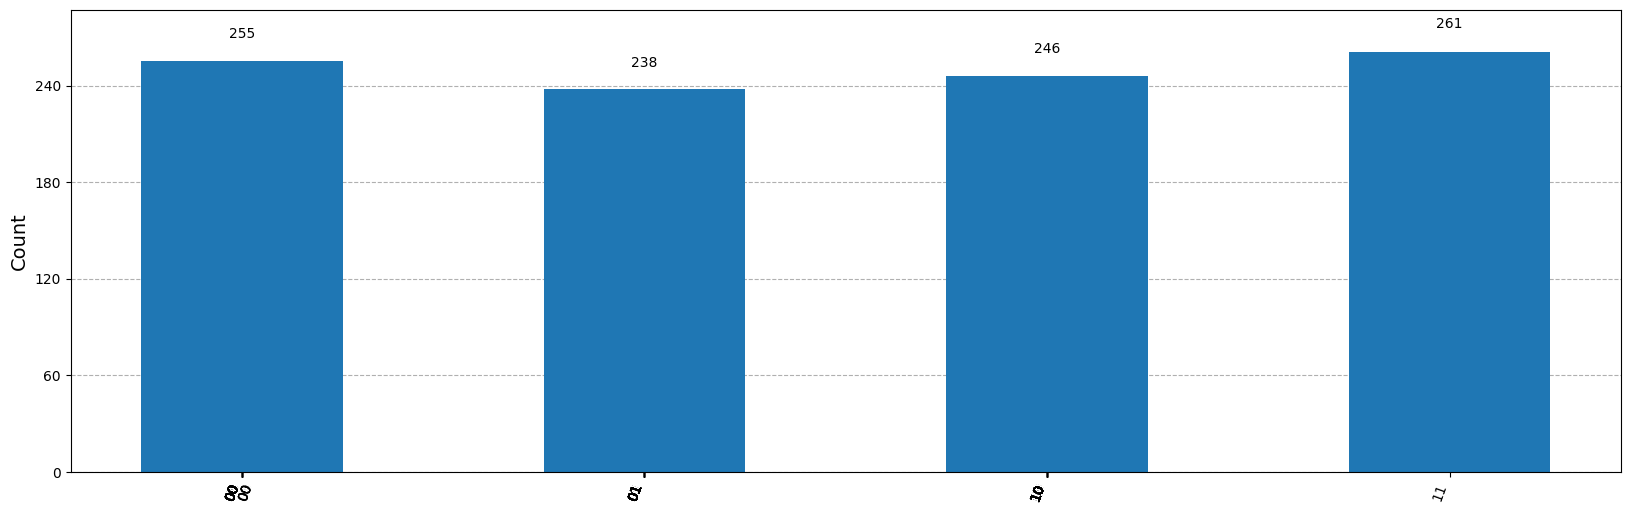

In [10]:
from qiskit import transpile
import matplotlib.pyplot as plt

qc_transpiled = transpile(grover, backend)
job = backend.run(qc_transpiled, shots=1000)

import qiskit
if qiskit.__version__ < '1.0.0':
    # The job monitor is only compatible with qiskit versions smaller than 1.0
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)

res=job.result()
counts=res.get_counts()

#Plot the results
from qiskit.visualization import plot_histogram
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()


In [11]:
from iqm.qiskit_iqm import IQMProvider

# Instead of setting the environment variable, you could add the token as an argument to the IQMProvider constructor
provider=IQMProvider(url="https://cocos.resonance.meetiqm.com/garnet")
backend = provider.get_backend()

C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:150: UserWarning: The given IQM Server URL is in a deprecated format, see the client initialization instructions and correct URL format from the server web dashboard.
  warnings.warn(
C:\Users\user\anaconda3\envs\iqm_env\Lib\site-packages\iqm\iqm_server_client\iqm_server_client.py:171: UserWarning: Resonance CoCoS API is deprecated. Use https://resonance.meetiqm.com. See the Resonance documentation or https://docs.meetiqm.com/iqm-client/ for more detailed instructions.
  warnings.warn(


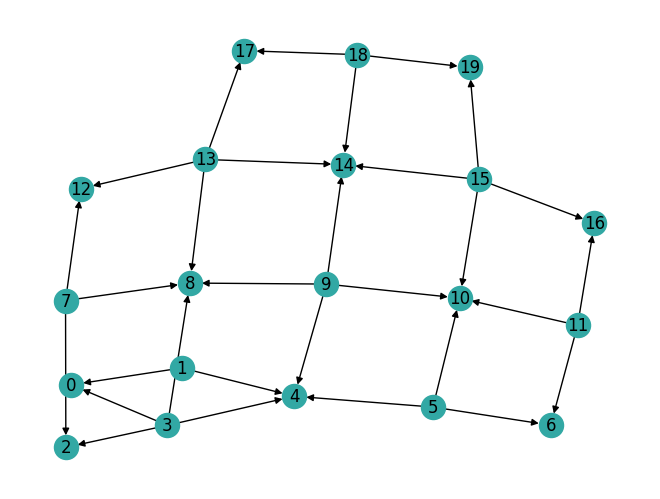

In [12]:
from rustworkx.visualization import mpl_draw
from rustworkx import spring_layout

mpl_draw(backend.coupling_map.graph, arrows=True, with_labels=True, node_color='#32a8a4', pos=spring_layout(backend.coupling_map.graph, num_iter=200))

Progress in queue:  60%|██████████████████████████████████████▍                         | 3/5 [06:57<04:38, 139.27s/it]


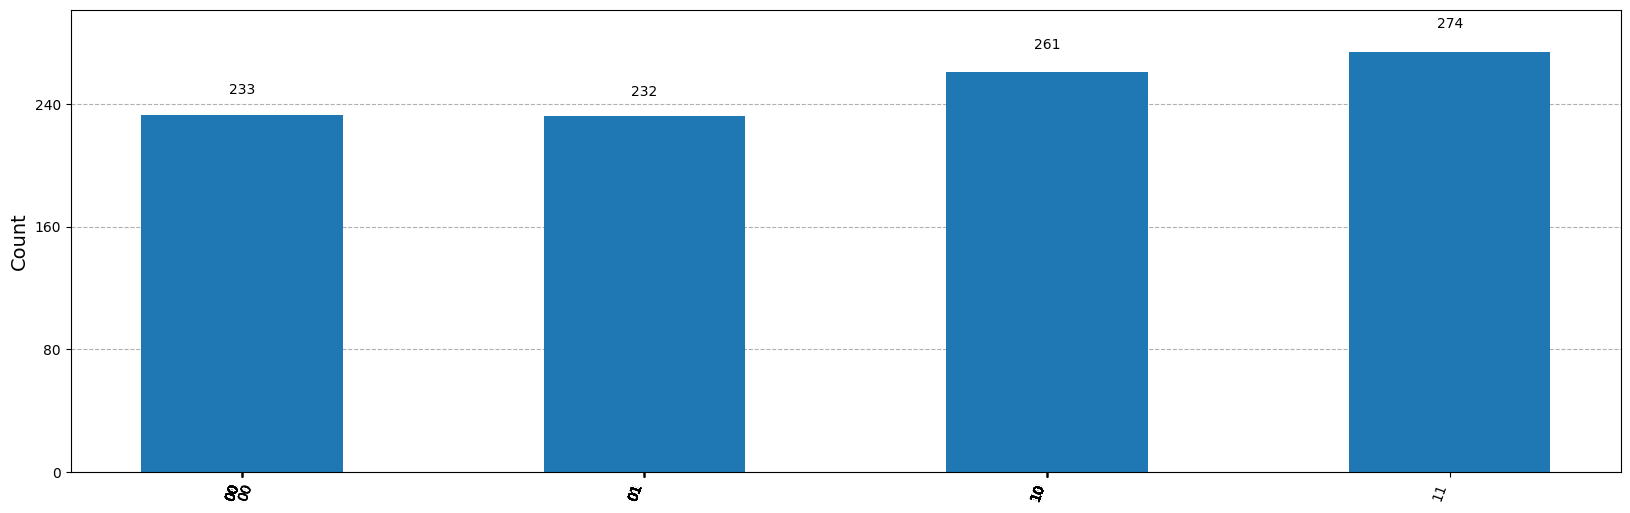

In [13]:
from qiskit import transpile
import matplotlib.pyplot as plt

qc_transpiled = transpile(grover, backend)
job = backend.run(qc_transpiled, shots=1000)

import qiskit
if qiskit.__version__ < '1.0.0':
    # The job monitor is only compatible with qiskit versions smaller than 1.0
    from qiskit.tools.monitor import job_monitor
    job_monitor(job)

res=job.result()
counts=res.get_counts()

#Plot the results
from qiskit.visualization import plot_histogram
import numpy as np

fig, ax = plt.subplots(figsize=(20, 6))
plot_histogram(counts, ax=ax)

desired_ticks = 2**6   ### decreasing the total number of tick labels to have a clean figure
x_ticks = np.linspace(0, len(counts)-1, desired_ticks, dtype=int)
ax.set_xticks(x_ticks)

plt.show()
